In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import matplotlib.animation as animation

import seaborn as sns; sns.set(style='white')
from scipy.stats import pearsonr

In [15]:
places_df = pd.read_csv('data/clean_mobility_data.csv')
places_df.head()

,Unnamed: 0,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,1,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,2,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,3,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,4,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [16]:
#this doesn't really make sense to do because we haven't idenfied an independent variable. Also the groups have to be groups or two thingies, right? 

nationwide_df = places_df[places_df['sub_region_1'].isnull()]

retail = nationwide_df['retail_and_recreation_percent_change_from_baseline']
grocery = nationwide_df['grocery_and_pharmacy_percent_change_from_baseline']
parks = nationwide_df['parks_percent_change_from_baseline']
transit = nationwide_df['transit_stations_percent_change_from_baseline']
wrokplace = nationwide_df['workplaces_percent_change_from_baseline']
home = nationwide_df['residential_percent_change_from_baseline']

stats.f_oneway(retail, grocery, parks, transit, wrokplace, home)


F_onewayResult(statistic=680.615654337728, pvalue=0.0)

In [17]:
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]


# for state in state_names:
#     graph_df = places_df[(places_df['sub_region_1'] == state) & (places_df['sub_region_2'].isnull())]

#     plt.figure(figsize=(5, 2.5))
#     plt.plot(graph_df['date'], graph_df['grocery_and_pharmacy_percent_change_from_baseline'])
#     plt.title(state)
#     plt.show()

In [18]:
#TODO do an ANOVA and also get some line graphs for significant states. 

#TODO use google maps api to make a heatmap by state. 

#TODO lit review

#TODO bin rural and urban data with same population sizes. That would be cool. 


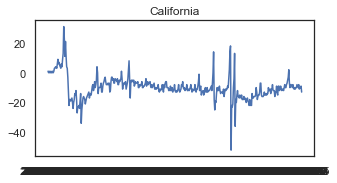

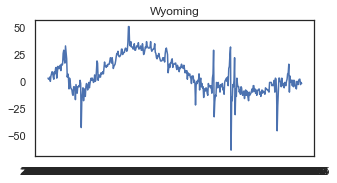

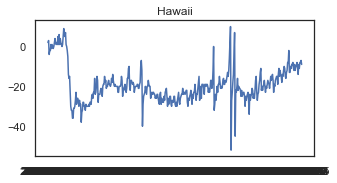

NameError: name 'mdates' is not defined

In [25]:
graph_df = places_df[(places_df['sub_region_1'] == 'California') & (places_df['sub_region_2'].isnull())]

plt.figure(figsize=(5, 2.5))
plt.plot(graph_df['date'], graph_df['grocery_and_pharmacy_percent_change_from_baseline'])
plt.title('California')
plt.show()

graph_df = places_df[(places_df['sub_region_1'] == 'Wyoming') & (places_df['sub_region_2'].isnull())]

plt.figure(figsize=(5, 2.5))
plt.plot(graph_df['date'], graph_df['grocery_and_pharmacy_percent_change_from_baseline'])
plt.title('Wyoming')
plt.show()

graph_df = places_df[(places_df['sub_region_1'] == 'Hawaii') & (places_df['sub_region_2'].isnull())]

plt.figure(figsize=(5, 2.5))
plt.plot(graph_df['date'], graph_df['grocery_and_pharmacy_percent_change_from_baseline'])
plt.title('Hawaii')
plt.show()

graph_df = places_df[(places_df['sub_region_1'] == 'North Dakota') & (places_df['sub_region_2'].isnull())]

plt.figure(figsize=(5, 2.5))
plt.plot(graph_df['date'], graph_df['grocery_and_pharmacy_percent_change_from_baseline'])
plt.title('North Dakota')

#date2 = pd.to_datetime(date, format="%Y/%m/%d")

plt.show()

In [ ]:
#TODO use google maps api to make a heatmap by state. 